In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the dataset

In [2]:
file_path = r"E:\..............A\my work\cours\mli\task1\first inten project.csv"
df = pd.read_csv(file_path)

# Clean column names

In [3]:
df.columns = df.columns.str.strip().str.lower()

# Rename specific columns if necessary

In [4]:
column_renames = {
    "average price": "average_price"
}
df.rename(columns=column_renames, inplace=True)

# Display basic information

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  p-c                       36285 non-null  int64  
 12  p-not-c                   36285 non-null  int64  
 13  average_price             36285 non-null  float64
 14  specia

# Handle missing values

In [6]:
df.dropna(inplace=True)

# Univariate Analysis

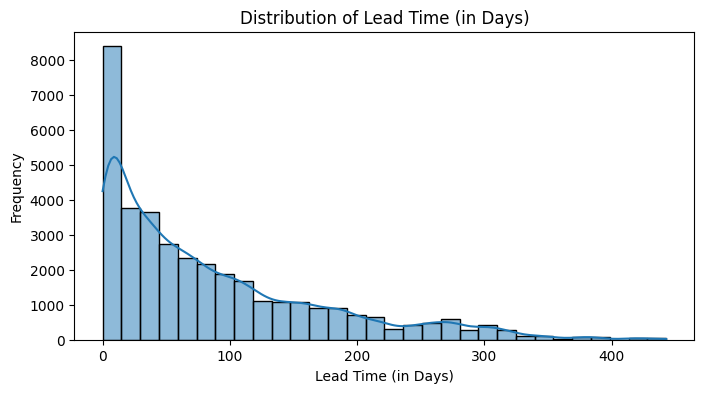

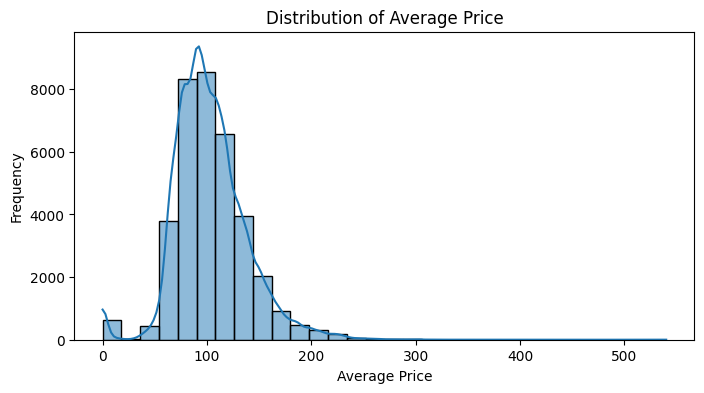

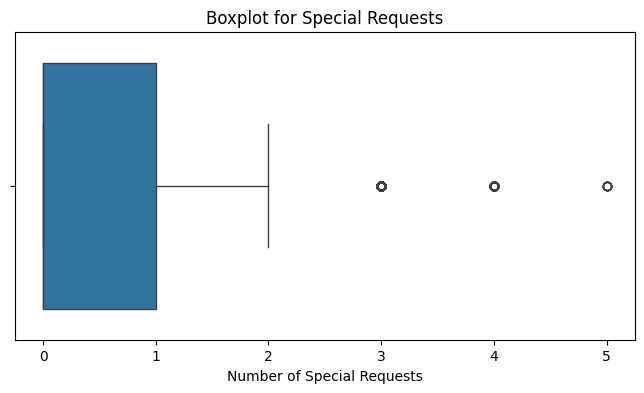

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(df['lead time'], kde=True, bins=30)
plt.title('Distribution of Lead Time (in Days)')
plt.xlabel('Lead Time (in Days)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['average_price'], kde=True, bins=30)
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['special requests'])
plt.title('Boxplot for Special Requests')
plt.xlabel('Number of Special Requests')
plt.show()

# Categorical Features

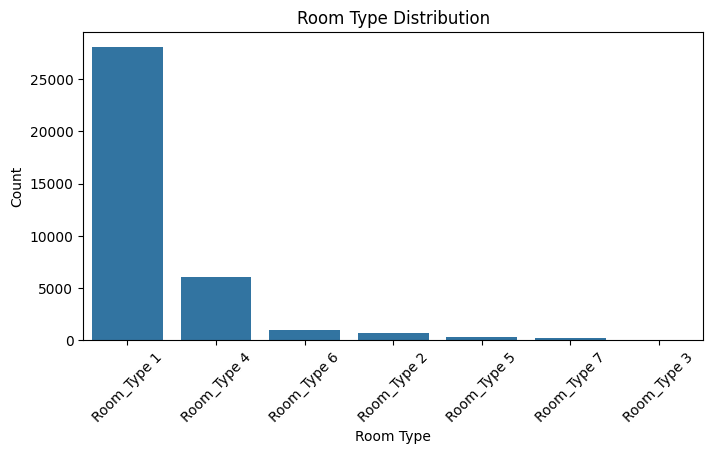

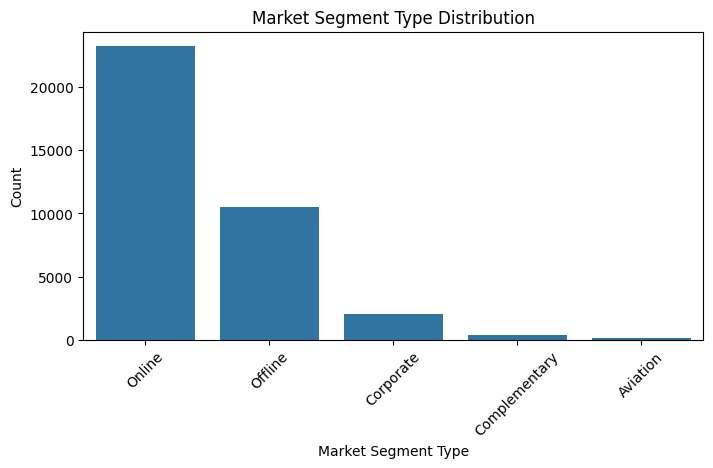

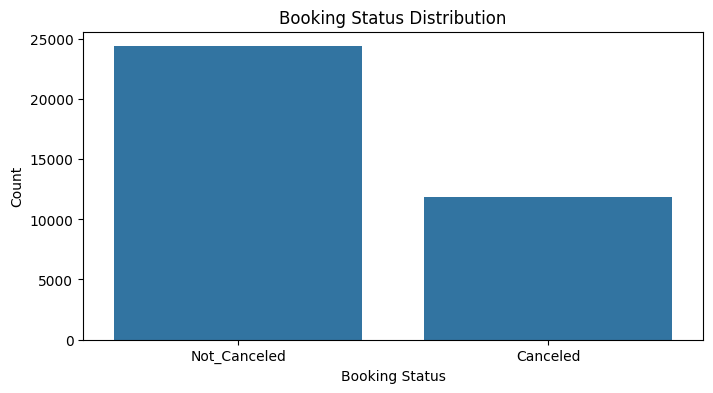

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['room type'], order=df['room type'].value_counts().index)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x=df['market segment type'], order=df['market segment type'].value_counts().index)
plt.title('Market Segment Type Distribution')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x=df['booking status'], order=df['booking status'].value_counts().index)
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

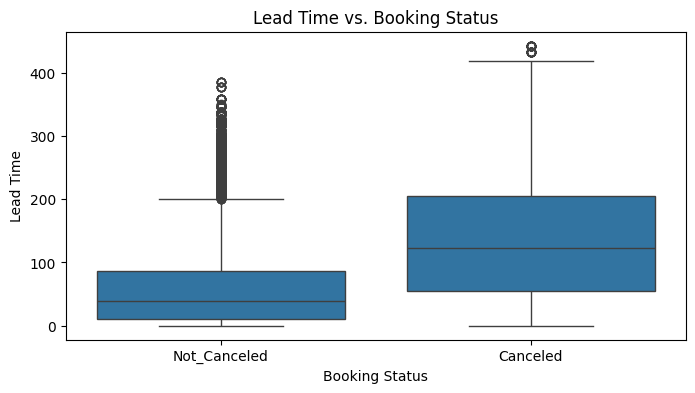

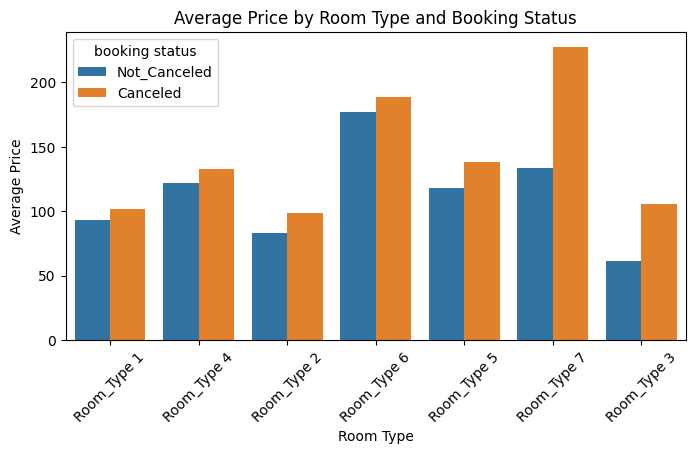

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['booking status'], y=df['lead time'])
plt.title('Lead Time vs. Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='room type', y='average_price', hue='booking status', data=df, errorbar=None)
plt.title('Average Price by Room Type and Booking Status')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap

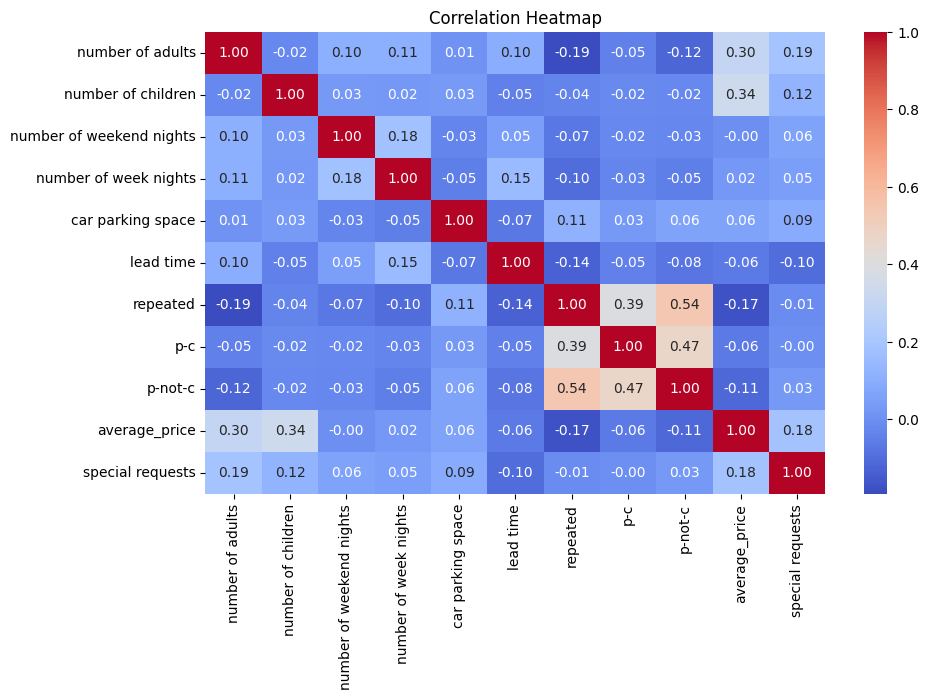

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Multivariate Analysis

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

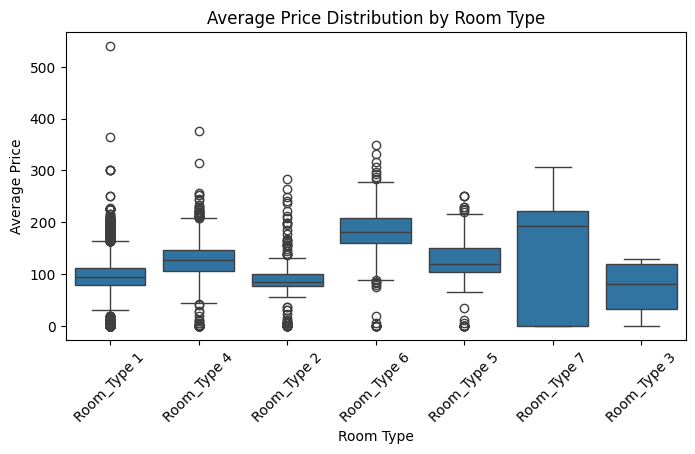

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='room type', y='average_price', data=df)
plt.title('Average Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# showing cancellation rates by market segment type

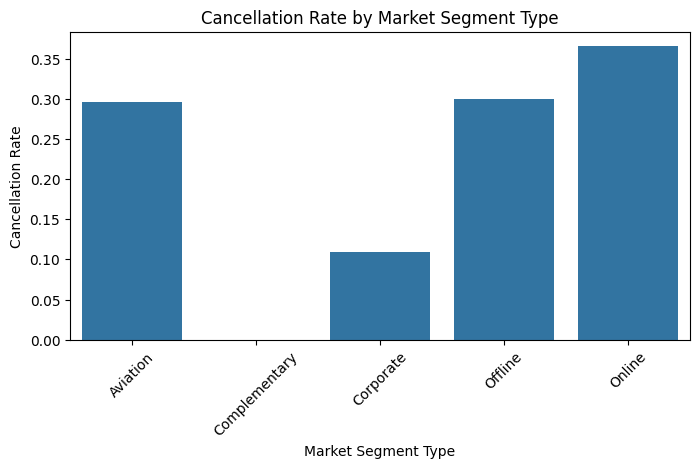

In [12]:
df['booking status'] = df['booking status'].map({'Not_Canceled': 0, 'Canceled': 1})
cancellation_rate = df.groupby('market segment type')['booking status'].apply(lambda x: (x == 1).mean()).reset_index()
df['booking status'] = df['booking status'].astype(int)
cancellation_rate = df.groupby('market segment type')['booking status'].apply(lambda x: (x == 1).mean()).reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(data=cancellation_rate, x='market segment type', y='booking status')
plt.title('Cancellation Rate by Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

# Encode categorical variables

In [13]:

label_encoders = {}
categorical_features = ['type of meal', 'car parking space', 'room type', 'market segment type', 'booking status']
categorical_features = [col.strip().lower() for col in categorical_features]

for feature in categorical_features:
    if feature in df.columns:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        label_encoders[feature] = le

# Define numerical features

In [14]:
numerical_features = ['number of adults', 'number of children', 'number of weekend nights', 
                    'number of week nights', 'lead time', 'average_price', 'special requests']
numerical_features = [col.strip().lower() for col in numerical_features]

# Prepare data for KNN

In [15]:
X = df[numerical_features]
y = df['booking status']

# Standardize features

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN Model

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Predict and Evaluate

In [19]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      4855
           1       0.79      0.69      0.74      2402

    accuracy                           0.84      7257
   macro avg       0.82      0.80      0.81      7257
weighted avg       0.83      0.84      0.83      7257

Confusion Matrix:
 [[4418  437]
 [ 747 1655]]
